In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    x = np.linspace(-10, 10, num_points)
    gaussian_curve = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    noise = np.random.normal(0, noise_level, num_points)
    
    noisy_gaussian = gaussian_curve + noise
    return x, noisy_gaussian

def plot_gaussians(num_points, mean, std_dev, noise_level, seed=None):
    x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level, seed)
    plt.plot(x, y)
    plt.show()

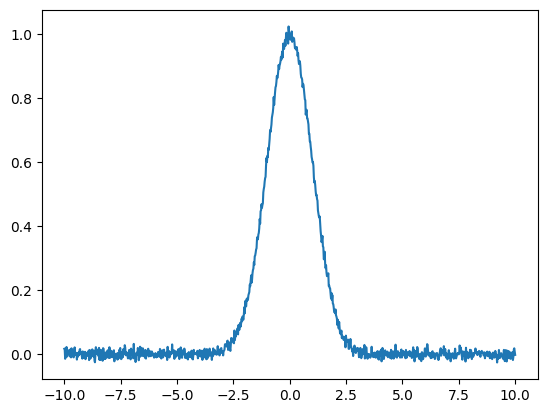

In [ ]:
plot_gaussians(1000, 0, 1, 0.01)

In [3]:
# checking auto-corelation and cross-corelation between the generated gaussian curve and itself.
def auto_correlation(num_points, mean, std_dev, noise_level,seed):
    x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level,seed)
    auto_corr = np.correlate(y, y, mode='full')
    plt.plot(auto_corr)
    plt.title("Auto-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show()
def cross_correlaiton(y,y2):
    # x, y = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    # x, y2 = generate_gaussian_curve_with_noise(num_points, mean, std_dev, noise_level)
    cross_corr = np.correlate(y, y2, mode='full')
    plt.plot(cross_corr)
    plt.title("Cross-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show() 

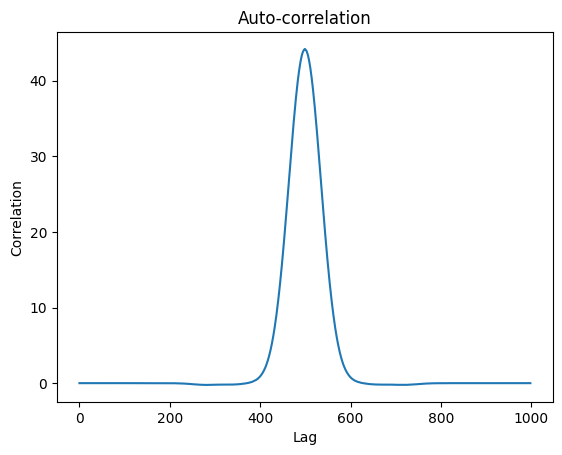

In [4]:
auto_correlation(500, 0, 1, 0.01,None)
# why is it showing a dependence on the number of points?
# happens beacuse the auto-correlation would happen in fourier domani, and that oeuld actually generate 2N points, so the final lag is a funciton of N points. 

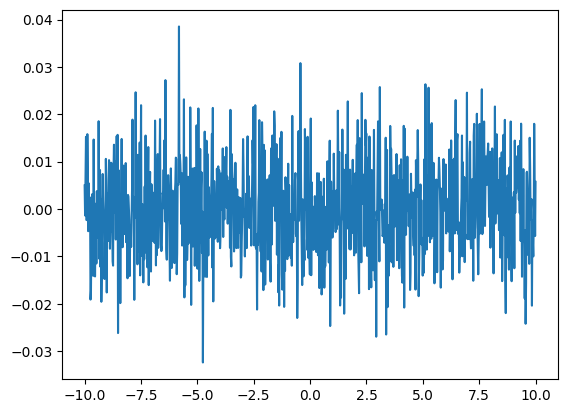

In [5]:
plot_gaussians(1000, -20, 1, 0.01,42)

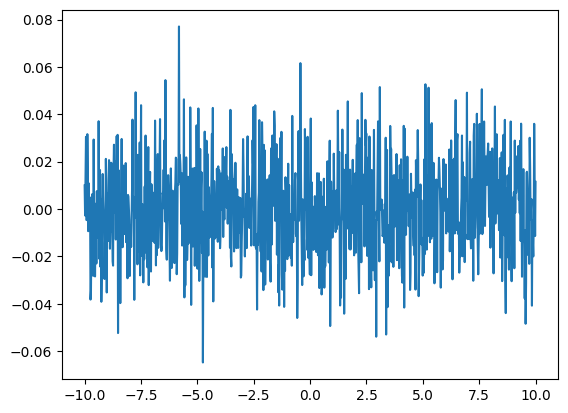

In [6]:
plot_gaussians(1000,20,1,0.02,42)

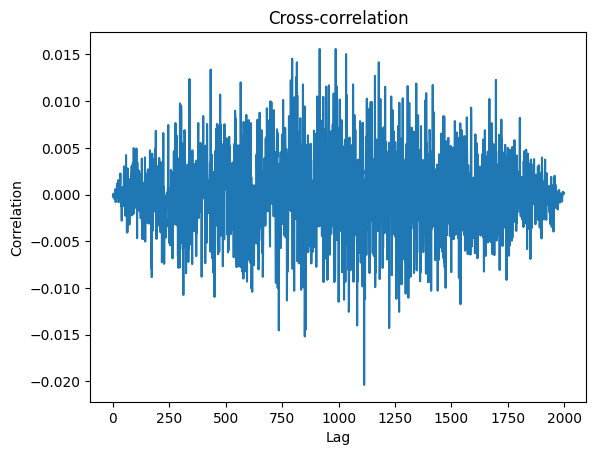

In [7]:
x,y=generate_gaussian_curve_with_noise(1000, 20, 1, 0.01,None)
x,y2=generate_gaussian_curve_with_noise(1000,-20,1,0.02,None)
cross_correlaiton(y,y2)
# the peak shifts, to right when one of the gaussians
# have a negative mean and to the left when one of the gaussians have a positive mean, for only finite
# values of lags, the peak is at the mean difference of the two gaussians, when mean is incresed, then we see multiple peaks.
# the noise scales the y-axis.

In [8]:
# fft and cross-correlation(convoultion), packing, unapcking and then, false detection  probability, to minimize false correlation between gaussian.
# longss-karggle period algortihm.(btter htan fft.)

https://chatgpt.com/share/67ae5141-f6d8-8012-a554-3019dbed4799 - link to the chat

Here’s the intuition behind using **FFT** and **convolution** for finding correlations between signals:

### **FFT**:
- When signals are periodic or have repeating patterns, these patterns can be better understood in the frequency domain.
- **Frequency Domain Insight**: FFT transforms signals into frequencies, making it easier to spot how similar frequencies (patterns) between two signals align or differ.
- **Cross-correlation via FFT**: By multiplying the frequency components of one signal with the conjugate of the other, you essentially measure how well the signals "match" across all frequencies. The inverse FFT then converts this information back to the time domain, showing how the two signals align or differ over time (i.e., correlation).

### **Convolution**:
- **Convolution** measures how much one signal overlaps with a time-shifted version of another signal. Imagine sliding one signal over another and recording how well they align at each step.
- **Why it works**: If two signals are similar, shifting one over the other (convolution) will result in a high output when they are aligned. This reveals similarities and time lags between the signals.
  
### Key Idea: Both methods explore how signals **align** with each other, either in time (convolution) or in frequency (FFT cross-correlation), making them useful for detecting similarities and patterns.


To see the correlation between signals using **FFT** and **convolution**:

1. **FFT**:
   - **Cross-correlation** between two signals can be computed using FFT. The correlation is done by multiplying the FFT of one signal with the complex conjugate of the FFT of the other signal, then applying an inverse FFT.
   - This method is efficient for large datasets and helps identify similarities (correlation) between signals in the frequency domain.
   
   **Formula**:
   $\text{Corr}(f,g) = \text{IFFT}(\text{FFT}(f) \times \text{FFT}^*(g))$,
   Where \( f \) and \( g \) are the two signals, and \( * \) is the complex conjugate.

2. **Convolution**:
   - Convolution of two signals is mathematically equivalent to cross-correlation but with one signal reversed. It gives insight into how much one signal overlaps with a time-shifted version of another signal, indicating their correlation.
   
   **Key insight**: Convolution and correlation help in detecting time lags, phase shifts, and similarity between signals.

**False detection probability (FDP)** refers to the probability that a detected signal or event is actually **false**, meaning it is not a true signal but rather a result of noise, random fluctuations, or other errors in the data.

In other words, it measures the likelihood that a detection (e.g., in signal processing, statistical analysis, or astrophysics) is a **false positive**.

### Example in signal detection:
- If you are searching for pulsar signals and detect a signal, the false detection probability tells you how likely it is that this detected signal is just noise rather than a real pulsar signal.

A **low FDP** means there’s a high confidence that the detection is real, while a **high FDP** suggests a greater chance of the detection being spurious.

[np.correlate does the correlation in the time domain rather than the frequency domain.](https://numpy.org/doc/2.1/reference/generated/numpy.correlate.html)

In [22]:
# performnig the correlation in the fourier domain, so that we simply multiply the fourier transforms of the two signals, and then take the inverse fourier transform to get the cross-correlation.
def cross_correlation_fft(y, y2):
    # Zero-padding to avoid edge effects
    n = len(y) + len(y2) - 1
    y_fft = np.fft.fft(y, n=n)
    y2_fft = np.fft.fft(y2, n=n)
    
    # Cross-correlation in Fourier domain
    cross_corr = np.fft.ifft(y_fft * np.conj(y2_fft))
    
    # Shift the result so the peak is centered
    # cross_corr = np.fft.fftshift(cross_corr)
    
    # Plot real part of cross-correlation
    plt.plot(np.real(cross_corr))
    plt.title("Cross-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.show()

In [23]:
# want ot see how the convolution would actually 

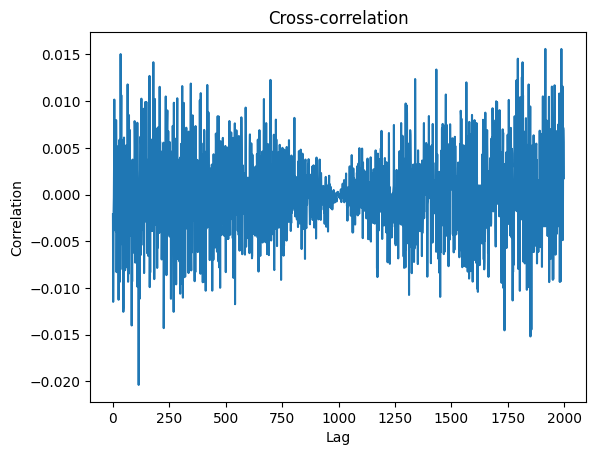

In [11]:
cross_correlation_fft(y,y2)

- statical errors and threshold for that error, the above function works, i just have to write a false detection probabilty, so it should not be beats, it should only be a line.
- so probably the random number generator is introducing prediodicity.

In [12]:
from sklearn.metrics import confusion_matrix

def false_prediction_probability(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_predictions = tn + fp + fn + tp
    false_prediction_prob = (fp + fn) / total_predictions
    return false_prediction_prob

## plotting the .NB.txt file in freq domain for i epoch

C:\Users\vvagh\AppData\Local\Temp\ipykernel_27468\432735462.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('J0437-4715_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)


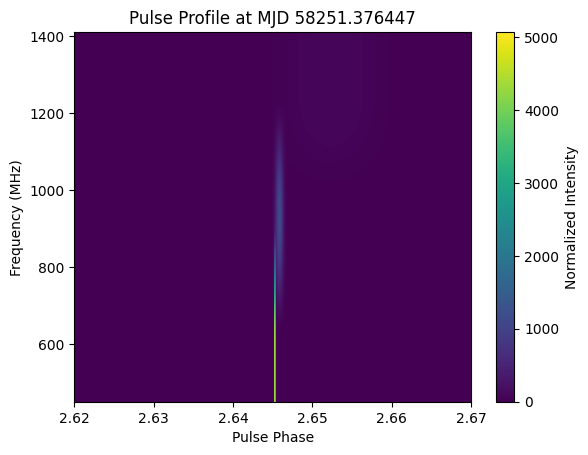

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Load and filter data
cols = ['MJD', 'ToA', 'Error', 'SNR', 'P1', 'P2', 'P3', 'Freq', 'BW', 'Telescope', 'Band']
df = pd.read_csv('J0437-4715_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)

# Choose one MJD (epoch)
epoch = df['MJD'].iloc[0]
subset = df[df['MJD'] == epoch]

# Create pulse phase axis
phase = np.linspace(2.62, 2.67, 500)  # Adjust as needed

# Build image: one Gaussian per frequency
image = []
freqs = []

for _, row in subset.iterrows():
    profile = norm.pdf(phase, loc=row['ToA'], scale=row['Error'])
    image.append(profile)
    freqs.append(row['Freq'])

# Convert to array
image = np.array(image)

# Plot waterfall
plt.imshow(image, aspect='auto', extent=[phase[0], phase[-1], min(freqs), max(freqs)],
           origin='lower', cmap='viridis')
plt.colorbar(label='Normalized Intensity')
plt.xlabel('Pulse Phase')
plt.ylabel('Frequency (MHz)')
plt.title(f'Pulse Profile at MJD {epoch}')
plt.show()

## plotting the pulse profiles in time domain

C:\Users\vvagh\AppData\Local\Temp\ipykernel_7320\1791388370.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('J0437-4715_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)


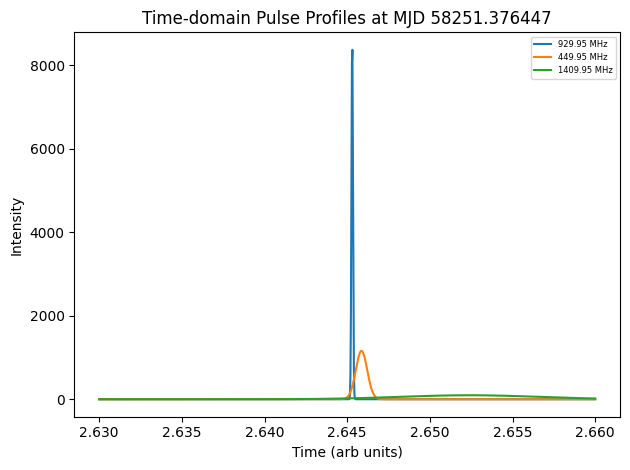

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

# Load data
cols = ['MJD', 'ToA', 'Error', 'SNR', 'P1', 'P2', 'P3', 'Freq', 'BW', 'Telescope', 'Band']
df = pd.read_csv('J0437-4715_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)

# Select one epoch
epoch = df['MJD'].iloc[0]
subset = df[df['MJD'] == epoch]

# Time axis (in microseconds or seconds — depending on unit)
t = np.linspace(2.63, 2.66, 1000)  # Around the ToA range

# Plot each Gaussian pulse
for _, row in subset.iterrows():
    pulse = norm.pdf(t, loc=row['ToA'], scale=row['Error'])
    plt.plot(t, pulse, label=f"{row['Freq']} MHz")

plt.xlabel("Time (arb units)")
plt.ylabel("Intensity")
plt.title(f"Time-domain Pulse Profiles at MJD {epoch}")
plt.legend(loc='upper right', fontsize=6)
plt.tight_layout()
plt.show()


## line plots in the freq domain

C:\Users\vvagh\AppData\Local\Temp\ipykernel_7320\3722906198.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('J0437-4715_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)


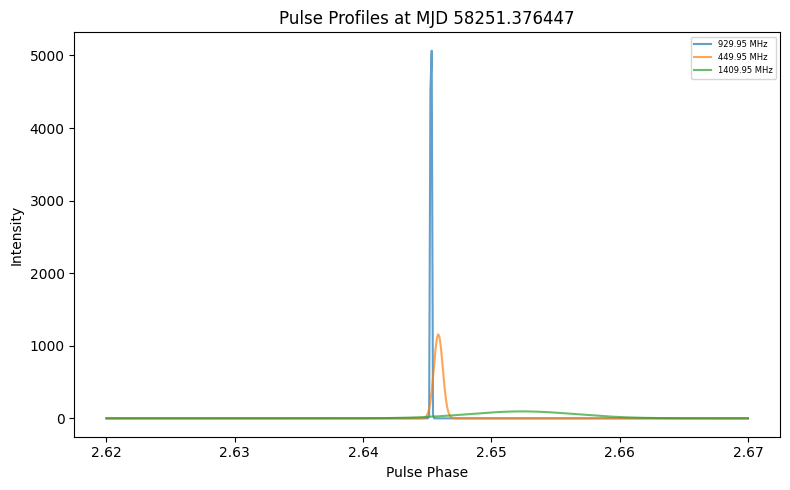

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Load and filter data
cols = ['MJD', 'ToA', 'Error', 'SNR', 'P1', 'P2', 'P3', 'Freq', 'BW', 'Telescope', 'Band']
df = pd.read_csv('J0437-4715_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)

# Choose one MJD (epoch)
epoch = df['MJD'].iloc[0]
subset = df[df['MJD'] == epoch]

# Create pulse phase axis
phase = np.linspace(2.62, 2.67, 500)

# Plot each Gaussian as a line
plt.figure(figsize=(8, 5))
for _, row in subset.iterrows():
    profile = norm.pdf(phase, loc=row['ToA'], scale=row['Error'])
    plt.plot(phase, profile, label=f"{row['Freq']} MHz", alpha=0.7)

plt.xlabel('Pulse Phase')
plt.ylabel('Intensity')
plt.title(f'Pulse Profiles at MJD {epoch}')
plt.legend(fontsize=6, loc='upper right')
plt.tight_layout()
plt.show()

In [16]:
grouped = df.groupby(['MJD', 'Freq'])
profiles = {}

for (mjd, freq), group in grouped:
    toa = group['ToA'].values[0]
    error = group['Error'].values[0]
    phase = np.linspace(toa - 5 * error, toa + 5 * error, 500)
    profile = norm.pdf(phase, loc=toa, scale=error)
    profiles[(mjd, freq)] = profile


- Same freq, different MJDs → auto-correlation over time
- Different freqs, same MJD → cross-correlation to observe dispersion
- Different freqs, different MJDs → mixed effects: dispersion + time variation

[some insights ig](https://chatgpt.com/share/685686ed-a324-8012-9046-7a19698e7e75)

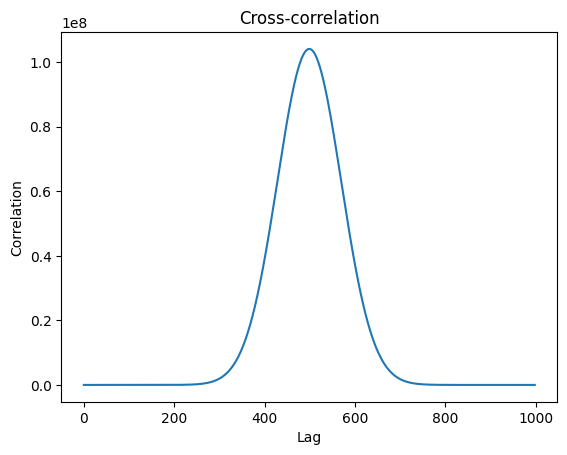

In [ ]:
y1 = profiles[(58251.376447, 449.95)]
y2 = profiles[(58284.301505, 449.95)]
cross_correlaiton(y1, y2)
# this is the cross-correlation between two different epochs for the same frequency of a single pulsar.
# The peak in the cross-correlation indicates the similarity in pulse profiles at different epochs.x`   `

## getting a single pulse profile, from the given .NB.txt file.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.signal import correlate
from collections import defaultdict

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_average_profile(filepath, target_freq=None, phase_bins=1000):
    cols = ['MJD', 'ToA', 'Error', 'SNR', 'P1', 'P2', 'P3', 'Freq', 'BW', 'Telescope', 'Band']
    df = pd.read_csv(filepath, delim_whitespace=True, names=cols)
    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['ToA', 'Error'])

    if target_freq:
        df = df[np.isclose(df['Freq'], target_freq, atol=1.0)]

    phase = np.linspace(0, 1, phase_bins)
    profiles = []

    for _, row in df.iterrows():
        prof = norm.pdf(phase, loc=row['ToA'] % 1, scale=row['Error'])
        prof /= prof.max()
        profiles.append(prof)

    ref = profiles[0]
    aligned_profiles = [np.roll(p, np.argmax(np.correlate(ref, p, mode='full')) - len(p) + 1) for p in profiles]
    avg_profile = np.mean(aligned_profiles, axis=0)

    plt.plot(phase, avg_profile)
    plt.title("Average Pulse Profile")
    plt.xlabel("Pulse Phase")
    plt.ylabel("Normalized Intensity")
    plt.grid()
    plt.show()

    return phase, avg_profile

C:\Users\vvagh\AppData\Local\Temp\ipykernel_15680\2144806684.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, names=cols)


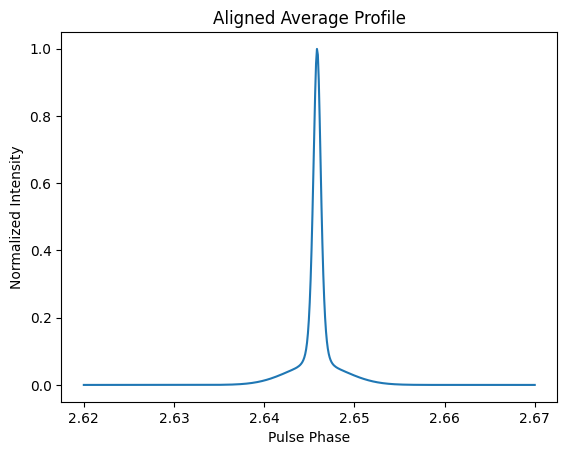

In [3]:
phase, profile = generate_average_profile("J0437-4715_DM_timeseries.NB.txt", target_freq=449.95)
import matplotlib.pyplot as plt
plt.plot(phase, profile)
plt.title("Aligned Average Profile")
plt.xlabel("Pulse Phase")
plt.ylabel("Normalized Intensity")
plt.show()

C:\Users\vvagh\AppData\Local\Temp\ipykernel_15680\1460930148.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('J0613-0200_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)


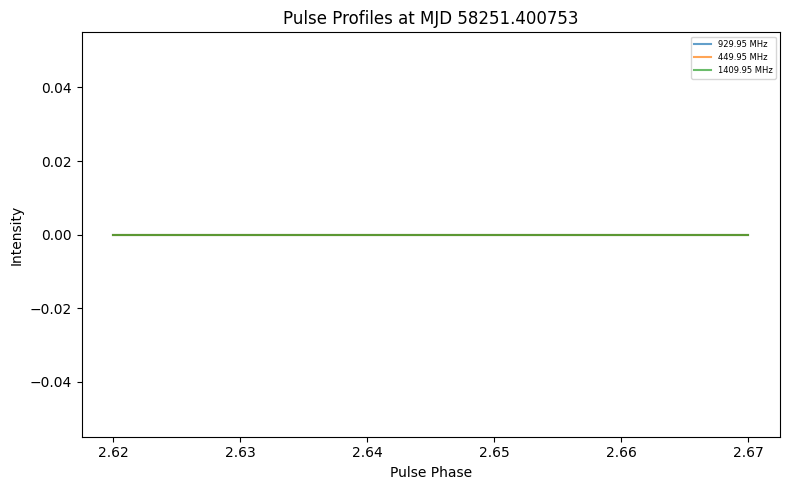

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Define column names and load the data
cols = ['MJD', 'ToA', 'Error', 'SNR', 'P1', 'P2', 'P3', 'Freq', 'BW', 'Telescope', 'Band']
df = pd.read_csv('J0613-0200_DM_timeseries.NB.txt', delim_whitespace=True, names=cols)

# Select one epoch (MJD)
epoch = df['MJD'].iloc[0]
subset = df[df['MJD'] == epoch]

# Define pulse phase range
phase = np.linspace(2.62, 2.67, 500)

# Plot pulse profiles
plt.figure(figsize=(8, 5))
for _, row in subset.iterrows():
    profile = norm.pdf(phase, loc=row['ToA'], scale=row['Error'])
    plt.plot(phase, profile, label=f"{row['Freq']} MHz", alpha=0.7)

plt.xlabel('Pulse Phase')
plt.ylabel('Intensity')
plt.title(f'Pulse Profiles at MJD {epoch}')
plt.legend(fontsize=6, loc='upper right')
plt.tight_layout()
plt.show()


## 👆 comming blank for all the other files.

In [6]:
def get_best_frequency(df, min_count=3):
    freq_stats = df.groupby('Freq')['SNR'].agg(['mean', 'count'])
    freq_stats = freq_stats[freq_stats['count'] >= min_count]
    best_freq = freq_stats['mean'].idxmax()
    return best_freq

In [13]:
get_best_frequency(df)

np.float64(1360.1)

C:\Users\vvagh\AppData\Local\Temp\ipykernel_15680\2144806684.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, names=cols)
C:\Users\vvagh\AppData\Local\Temp\ipykernel_15680\2144806684.py:13: RuntimeWarning: invalid value encountered in divide
  profile /= profile.max()  # normalize


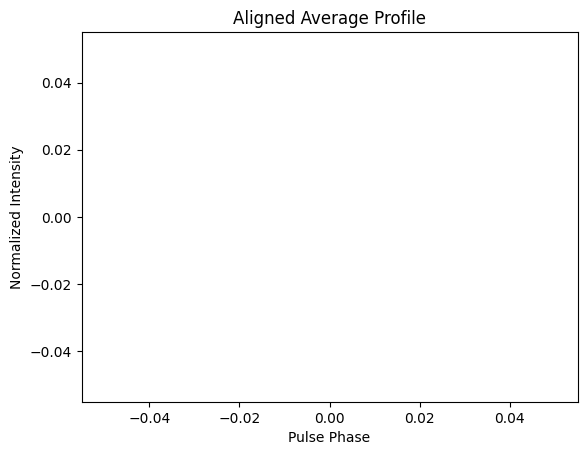

In [19]:
phase, profile = generate_average_profile("J0613-0200_DM_timeseries.NB.txt", target_freq=1360.1)
import matplotlib.pyplot as plt
plt.plot(phase, profile)
plt.title("Aligned Average Profile")
plt.xlabel("Pulse Phase")
plt.ylabel("Normalized Intensity")
plt.show()

## 👆 comming blank for other files.

In [43]:
def plot_average_profiles(filepaths, target_freq=None):
    import matplotlib.pyplot as plt
    import numpy as np

    data_dict = {}

    for filepath in filepaths:
        phase, profile = generate_average_profile(filepath, target_freq)
        filename = filepath.split('/')[-1].split('.')[0]
        data_dict[filename] = {
            'phase': np.nan_to_num(phase),
            'profile': np.nan_to_num(profile)
        }

    # Plot all profiles in one figure
    plt.figure(figsize=(10, 6))
    for name, data in data_dict.items():
        plt.plot(data['phase'], data['profile'], label=name, linewidth=2)

    plt.title("Aligned Average Pulse Profiles", fontsize=14)
    plt.xlabel("Pulse Phase", fontsize=12)
    plt.ylabel("Normalized Intensity", fontsize=12)
    plt.legend(title="Files", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Return only phase/profile lists without file names
    return {
        'phase': [data['phase'] for data in data_dict.values()],
        'profile': [data['profile'] for data in data_dict.values()]
    }

C:\Users\vvagh\AppData\Local\Temp\ipykernel_27468\333181050.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, names=cols)


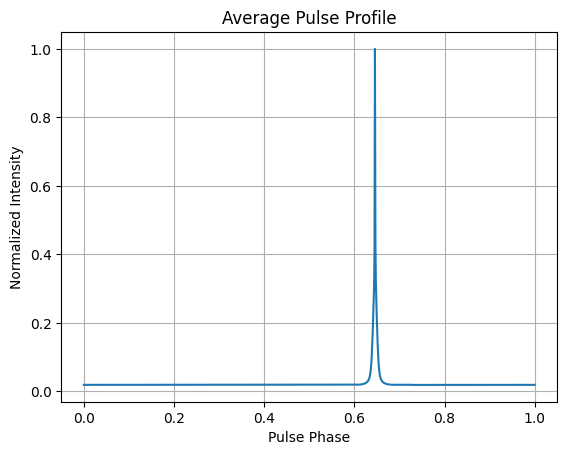

C:\Users\vvagh\AppData\Local\Temp\ipykernel_27468\333181050.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, names=cols)


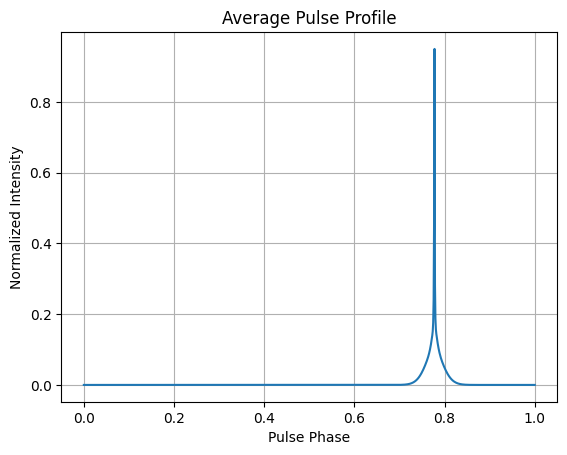

C:\Users\vvagh\AppData\Local\Temp\ipykernel_27468\333181050.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, names=cols)


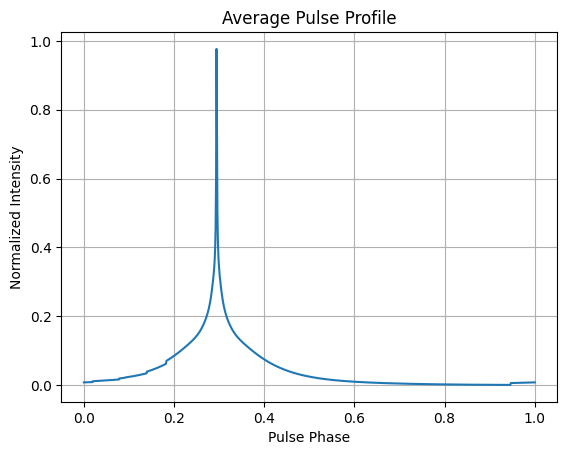

C:\Users\vvagh\AppData\Local\Temp\ipykernel_27468\333181050.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, names=cols)


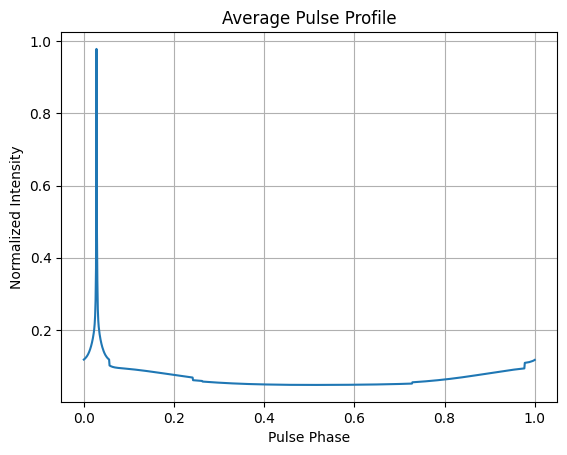

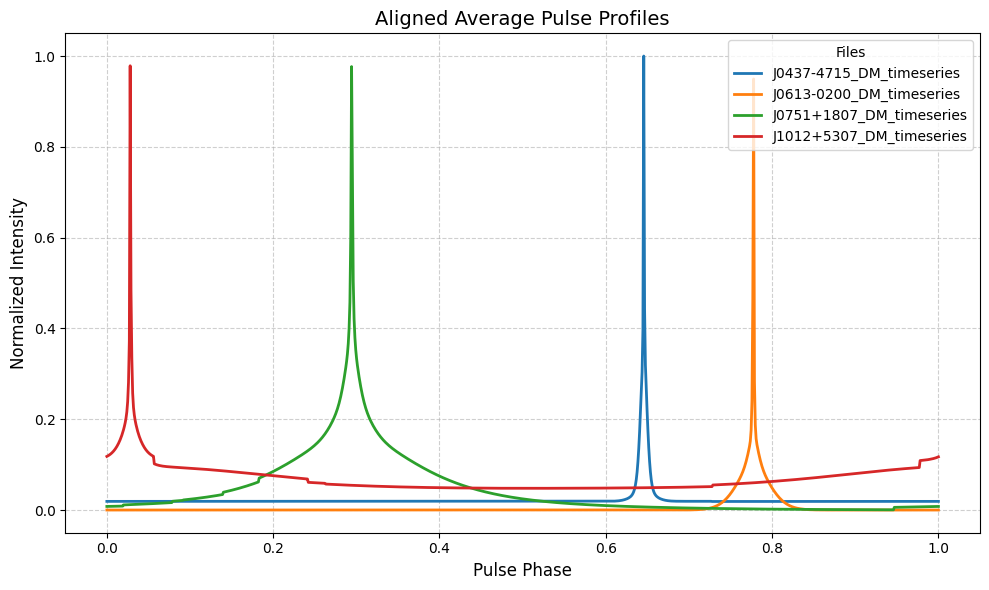

In [44]:
data=plot_average_profiles(["J0437-4715_DM_timeseries.NB.txt",'J0613-0200_DM_timeseries.NB.txt',"J0751+1807_DM_timeseries.NB.txt","J1012+5307_DM_timeseries.NB.txt"])

In [45]:
data

{'phase': [array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
         0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
         0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
         0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
         0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
         0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
         0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
         0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
         0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
         0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
         0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
         0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
         0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
         0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
         0.07007007, 0.07

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def correlate_profiles(data_dict):
    profiles = data_dict['profile']
    
    raw_corrs = []
    norm_corrs = []
    labels = []

    for i in range(len(profiles)):
        for j in range(i + 1, len(profiles)):
            a = profiles[i]
            b = profiles[j]

            # Unnormalized correlation
            raw = np.correlate(a, b, mode='full')
            raw_corrs.append(raw)

            # Normalized correlation
            norm = np.correlate(a - np.mean(a), b - np.mean(b), mode='full')
            norm /= (np.std(a) * np.std(b) * len(a))
            norm_corrs.append(norm)

            labels.append(f'Corr({i}, {j})')

    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    for raw, label in zip(raw_corrs, labels):
        axs[0].plot(raw, label=label)
    axs[0].set_title("Unnormalized Cross-Correlations")
    axs[0].set_ylabel("Correlation")
    axs[0].legend()

    for norm, label in zip(norm_corrs, labels):
        axs[1].plot(norm, label=label)
    axs[1].set_title("Normalized Cross-Correlations")
    axs[1].set_xlabel("Lag")
    axs[1].set_ylabel("Correlation")
    axs[1].legend()

    plt.tight_layout()
    plt.show()


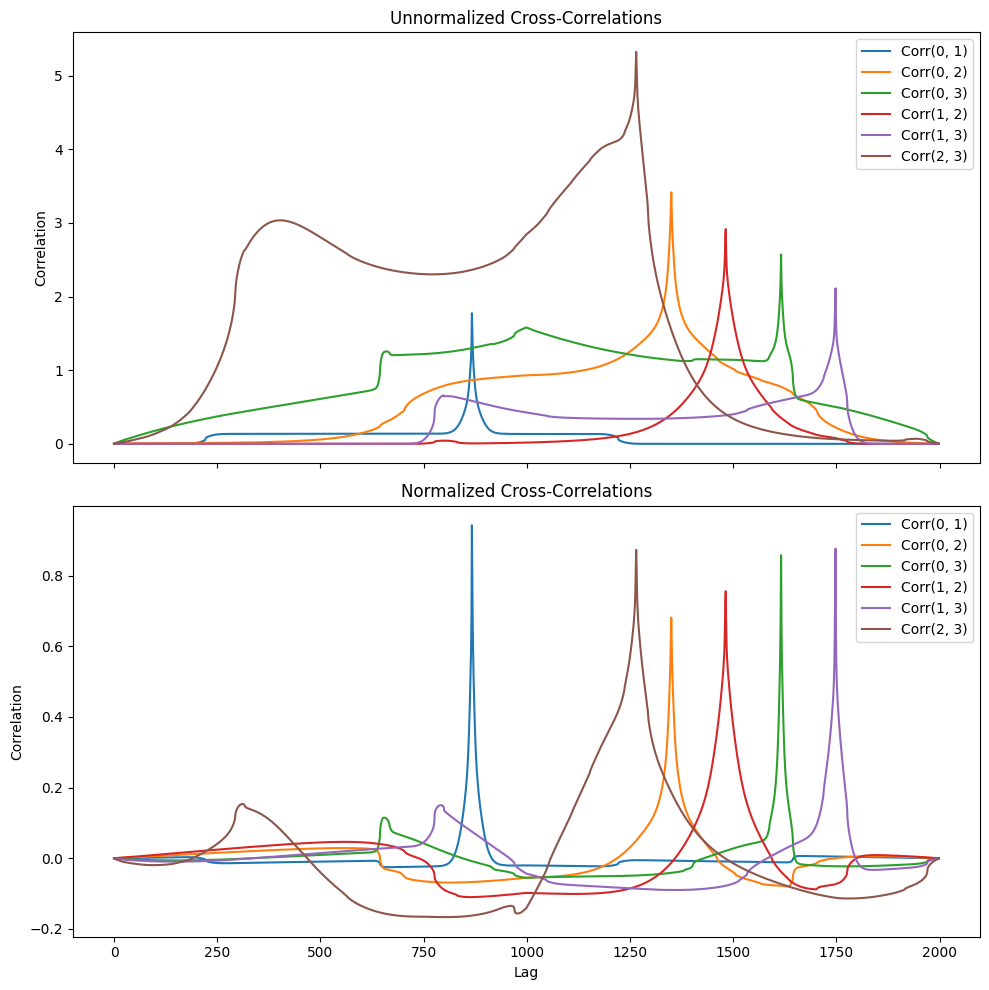

In [57]:
correlate_profiles(data)

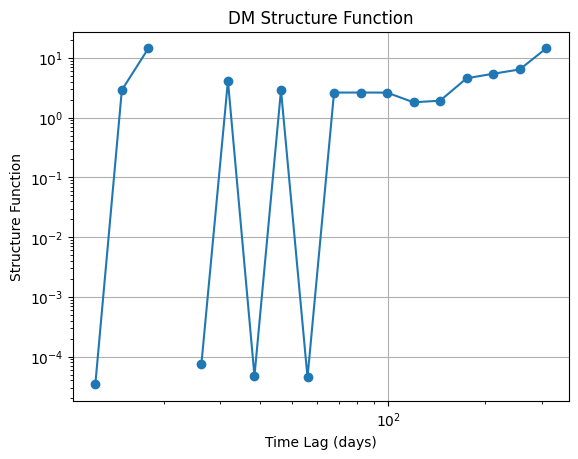

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load the text file (update filename as needed)
data = np.loadtxt('J0437-4715_DM_timeseries.NB.txt', usecols=(0, 1))  # MJD and DM

# Aggregate by unique MJD (average DM values across bands)
from collections import defaultdict
dm_dict = defaultdict(list)

for mjd, dm in data:
    dm_dict[mjd].append(dm)

# Compute average DM per epoch
times = []
avg_dm = []

for mjd in sorted(dm_dict.keys()):
    times.append(mjd)
    avg_dm.append(np.mean(dm_dict[mjd]))

# Structure Function
def compute_structure_function(times, dm_values):
    times = np.array(times)
    dm_values = np.array(dm_values)
    lags = np.logspace(0.1, np.log10(times[-1] - times[0]), 30)  # Logarithmic spacing for lags
    # lags = np.unique(lags)  # Ensure unique lags
    sf = []

    for tau in lags:
        diffs = []
        for i in range(len(times)):
            for j in range(i+1, len(times)):
                dt = abs(times[j] - times[i])
                if np.isclose(dt, tau, rtol=0.1):
                    diffs.append((dm_values[j] - dm_values[i])**2)
        sf.append(np.mean(diffs) if diffs else np.nan)

    return lags, np.array(sf)

lags, sf = compute_structure_function(times, avg_dm)

# Plot
plt.loglog(lags, sf, 'o-')
plt.xlabel('Time Lag (days)')
plt.ylabel('Structure Function')
plt.title('DM Structure Function')
plt.grid(True)
plt.show()

#### the data is sparse.

# trying to plot structure function for NANOgrav data and validating against the paper sent.

In [1]:
# process for a single pulsar parfile.
# need to look at the paper
parfile = r"NANOGrav_9y\par\B1855+09_NANOGrav_9yv1.gls.par"

base_DM = None
epochs = []
dm_values = []
dm_err=[]

with open(parfile) as f:
    for line in f:
        # Remove inline comments
        line = line.split("//")[0].split("#")[0].strip()
        if not line:
            continue

        parts = line.split()
        key = parts[0]
        

        # Base DM
        if key == "DM":
            base_DM = float(parts[1].replace("D", "E"))

        # DMX values and error values
        if key.startswith("DMX_") and not key.startswith("DMXEP"):
            idx = key.split("_")[1]
            dmx = float(parts[1].replace("D", "E"))
            dmxerr = float(parts[3].replace("D", "E")) if len(parts) > 2 else 0.0

            # search for matching epoch
            with open(parfile) as f2:
                for l2 in f2:
                    l2 = l2.split("//")[0].split("#")[0].strip()
                    if l2.startswith(f"DMXEP_{idx}"):
                        epoch = float(l2.split()[1].replace("D", "E"))
                        break

            epochs.append(epoch)
            dm_values.append(dmx)
            dm_err.append(dmxerr)

# Sort results
epochs, dm_values, dm_err = zip(*sorted(zip(epochs, dm_values, dm_err)))

for e, d, err in zip(epochs, dm_values, dm_err):
    print(f"MJD {e} -> DMX {d} ± {err}")

MJD 53358.72746 -> DMX 0.015161863 ± 0.00351684846
MJD 53420.54893 -> DMX 0.0152370685 ± 0.00351683449
MJD 53448.4737 -> DMX 0.0151895956 ± 0.00351649738
MJD 53477.39628 -> DMX 0.0151322502 ± 0.00351653508
MJD 53532.23281 -> DMX 0.0151076504 ± 0.00351662711
MJD 53603.03632 -> DMX 0.015263814 ± 0.00351647013
MJD 53628.96526 -> DMX 0.0151897641 ± 0.003516599
MJD 53686.79761 -> DMX 0.0152890326 ± 0.00351651389
MJD 53715.73064 -> DMX 0.0152484643 ± 0.0035165631
MJD 53750.62273 -> DMX 0.0153422398 ± 0.00351652136
MJD 53798.50108 -> DMX 0.015354092 ± 0.00351660466
MJD 53851.37182 -> DMX 0.0154295455 ± 0.0035165139
MJD 53891.24728 -> DMX 0.0154693407 ± 0.00351653286
MJD 53926.16326 -> DMX 0.0156001615 ± 0.00351689266
MJD 53968.05725 -> DMX 0.0157477908 ± 0.00351642748
MJD 54008.95372 -> DMX 0.0159397058 ± 0.0035163291
MJD 54043.83682 -> DMX 0.0159157339 ± 0.00351644531
MJD 54092.71265 -> DMX 0.016023921 ± 0.00351654202
MJD 54135.58282 -> DMX 0.0161119039 ± 0.00351660022
MJD 54177.47297 -> DMX

In [4]:
# calculation of chi-sq for this pulsar 
#((dm-dm_Avg)^2/err^2)*1/n-1
import numpy as np
dm_Avg=np.mean(dm_values)   
chi_sq = np.sum(((dm_values - dm_Avg) ** 2) / (np.array(dm_err) ** 2)) *(1/ (len(dm_values) - 1))
chi_sq

0.10113253430714741

In [6]:
import numpy as np

dm_values = np.array(dm_values, dtype=float)
dm_err    = np.array(dm_err, dtype=float)

N = len(dm_values)
if N < 2:
    raise ValueError("Need at least 2 DMX points to compute reduced chi-square.")
if np.any(dm_err == 0):
    raise ValueError("Zero error found in dm_err — cannot divide by zero.")

chi2 = np.sum(((dm_values - dm_values.mean()) / dm_err) ** 2)
dof = N - 1   # mean is fitted -> 1 parameter
chi2_reduced = chi2 / dof

# print("chi2 =", chi2)
print("chi2 (formula from paper) =", chi2_reduced)


chi2 (formula from paper) = 0.10113253430714744


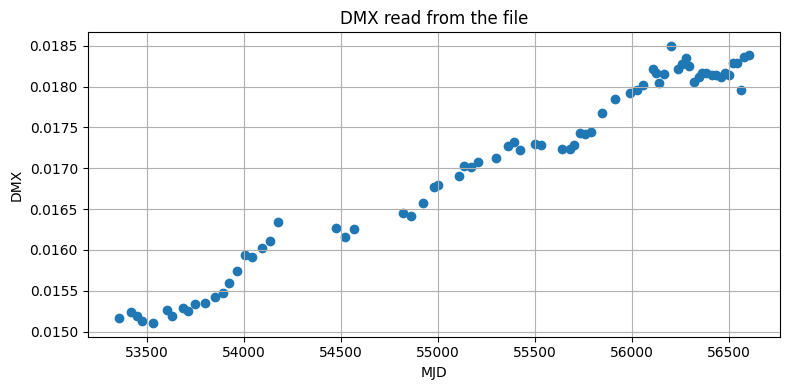

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.scatter(epochs, dm_values)
plt.xlabel("MJD")
plt.ylabel("DMX")
plt.title("DMX read from the file")
plt.grid(True)
plt.tight_layout()
plt.show()

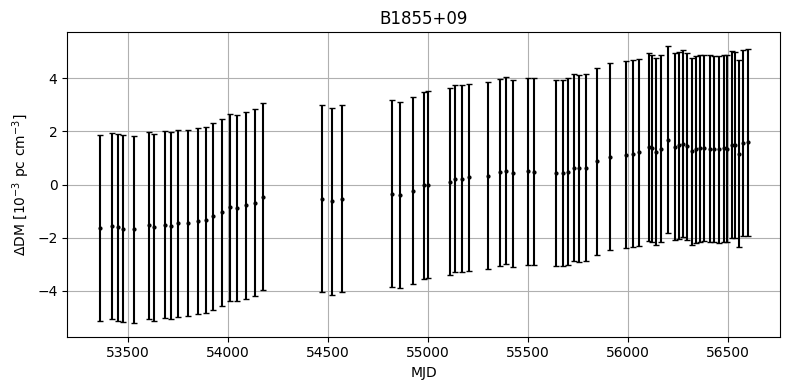

In [4]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.array(epochs)
dm_values = np.array(dm_values)
dm_errs = np.array(dm_err)

# --- Set reference DM for ΔDM ---
target_mjd = 55000

# find the index of the epoch closest to 55000
idx = np.argmin(np.abs(np.array(epochs) - target_mjd))
dm_ref = dm_values[idx]          # or choose a different reference
#after subtracting the refrence, the scale of dDM is in 10^-3 pc/cm^3 and so is the scale of the error
dDM = (dm_values - dm_ref) * 1e3   # convert to 10^-3 pc/cm^3
dDM_err = dm_errs *1e3
plt.figure(figsize=(8,4))

plt.errorbar(
    epochs,
    dDM,
    yerr=dDM_err,
    fmt='k.',          # black points like the paper
    capsize=2,
    markersize=4
)

plt.xlabel("MJD")
plt.ylabel(r"$\Delta \mathrm{DM}\ [10^{-3}\ \mathrm{pc\ cm^{-3}}]$")
plt.title("B1855+09")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
target_mjd = 55000

# find the index of the epoch closest to 55000
idx = np.argmin(np.abs(np.array(epochs) - target_mjd))

# subtract that DM value from all
dm_values = np.array(dm_values) - dm_values[idx]


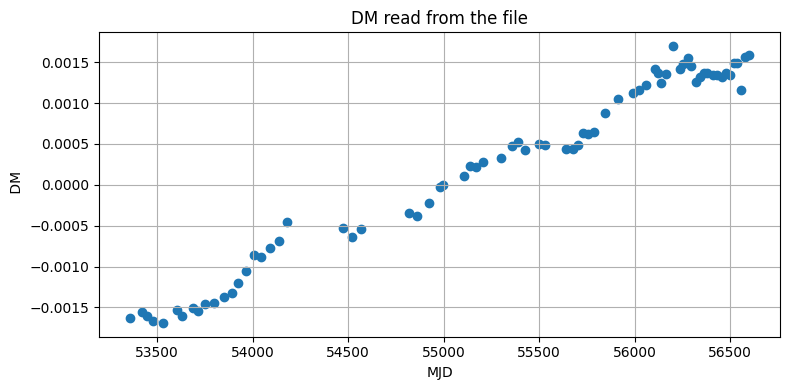

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(epochs, dm_values)
plt.xlabel("MJD")
plt.ylabel(" DM")
plt.title("DM read from the file")
plt.grid(True)
plt.tight_layout()
plt.show()

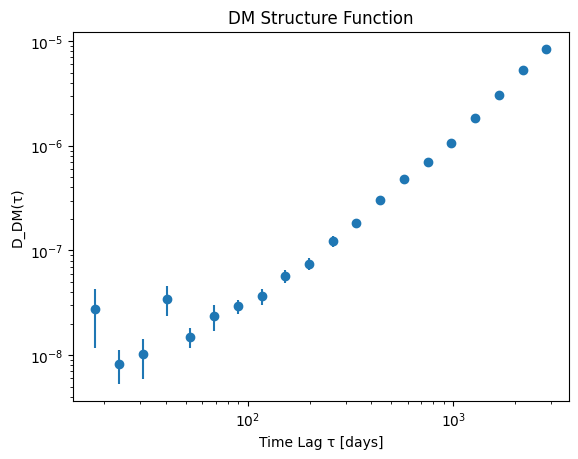

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dm_structure_function(epochs, dm_values, nbins=20):
    """
    Compute the 2nd-order structure function for DM variations.

    Parameters
    ----------
    epochs : array-like
        Times in MJD.
    dm_values : array-like
        Dispersion measures at those epochs.
    nbins : int
        Number of log-spaced bins for tau.

    Returns
    -------
    tau_centers : array
        Bin centers (time lag in days).
    DDM : array
        Structure function values for each bin.
    DDM_err : array
        Errors (std / sqrt(N)) for each bin.
    """

    epochs = np.array(epochs)
    dm_values = np.array(dm_values)

    # subtract mean DM
    dm_resid = dm_values - np.mean(dm_values)

    # pairwise time lags and squared diffs
    N = len(epochs)
    tau = []
    sqdiffs = []
    for i in range(N):
        for j in range(i+1, N):
            dt = abs(epochs[j] - epochs[i])
            diff = dm_resid[j] - dm_resid[i]
            tau.append(dt)
            sqdiffs.append(diff**2)

    tau = np.array(tau)
    sqdiffs = np.array(sqdiffs)

    # log-spaced bins
    bins = np.logspace(np.log10(np.min(tau)), np.log10(np.max(tau)), nbins+1)
    tau_centers = np.sqrt(bins[:-1] * bins[1:])  # geometric mean for center
    DDM = np.zeros(nbins)
    DDM_err = np.zeros(nbins)

    for k in range(nbins):
        mask = (tau >= bins[k]) & (tau < bins[k+1])
        if np.any(mask):
            vals = sqdiffs[mask]
            DDM[k] = np.mean(vals)
            DDM_err[k] = np.std(vals) / np.sqrt(len(vals))
        else:
            DDM[k] = np.nan
            DDM_err[k] = np.nan

    return tau_centers, DDM, DDM_err


# === Example usage with your single-file data ===
# epochs, dm_values = ...  # from the par-file parsing script

tau, DDM, DDM_err = dm_structure_function(epochs, dm_values)

plt.errorbar(tau, DDM, yerr=DDM_err, fmt='o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Time Lag τ [days]")
plt.ylabel("D_DM(τ)")
plt.title("DM Structure Function")
plt.show()


In [3]:
import numpy as np

def compute_structure_function(times, dm_values, nbins=30):
    times = np.array(times)
    dm_values = np.array(dm_values)

    # define log-spaced bins between min and max lag
    max_lag = times[-1] - times[0]
    lags = np.logspace(0.1, np.log10(max_lag), nbins)
    
    sf = []
    for tau in lags:
        diffs = []
        for i in range(len(times)):
            for j in range(i+1, len(times)):
                dt = abs(times[j] - times[i])
                # allow ~10% tolerance around tau
                if (0.9*tau <= dt <= 1.1*tau):
                    diffs.append((dm_values[j] - dm_values[i])**2)
        sf.append(np.mean(diffs) if diffs else np.nan)

    return lags, np.array(sf)


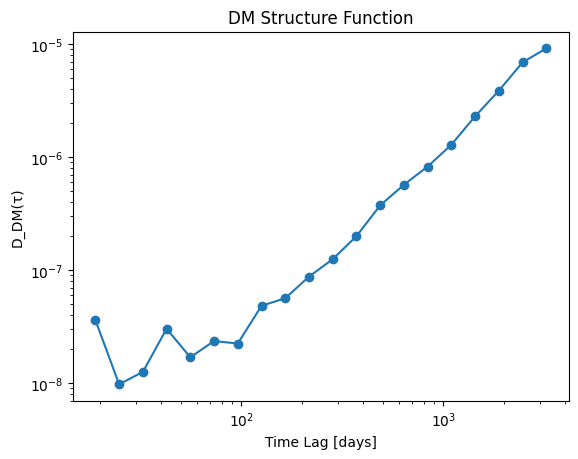

In [4]:
lags, sf = compute_structure_function(epochs, dm_values)

import matplotlib.pyplot as plt
plt.loglog(lags, sf, 'o-')
plt.xlabel("Time Lag [days]")
plt.ylabel("D_DM(τ)")
plt.title("DM Structure Function")
plt.show()


### trying a different code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def compute_structure_function(times, dm_values, nbins=30):
    times = np.array(times)
    dm_values = np.array(dm_values)

    max_lag = times[-1] - times[0]
    lags = np.logspace(0.1, np.log10(max_lag), nbins)
    
    sf, sf_err = [], []
    for tau in lags:
        diffs = []
        for i in range(len(times)):
            for j in range(i+1, len(times)):
                dt = abs(times[j] - times[i])
                if (0.9*tau <= dt <= 1.1*tau):
                    diffs.append((dm_values[j] - dm_values[i])**2)
        if diffs:
            diffs = np.array(diffs)
            sf.append(np.mean(diffs))
            sf_err.append(np.std(diffs)/np.sqrt(len(diffs)))  # standard error
        else:
            sf.append(np.nan)
            sf_err.append(np.nan)

    return lags, np.array(sf), np.array(sf_err)

# --- Example usage with synthetic data ---
# np.random.seed(0)
# times = np.linspace(0, 1000, 200)
# dm_values = np.cumsum(np.random.normal(0, 0.01, size=len(times)))  # random walk example

# lags, sf, sf_err = compute_structure_function(times, dm_values)

# --- Fit power law ---
def powerlaw(tau, A, beta):
    return A * tau**(beta-2)

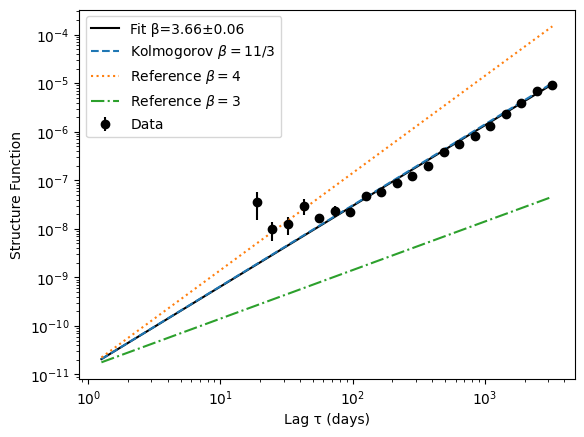

In [6]:
lags, sf, sf_err = compute_structure_function(epochs, dm_values)
valid = ~np.isnan(sf)
popt, pcov = curve_fit(powerlaw, lags[valid], sf[valid], p0=[1, 3.7])
A_fit, beta_fit = popt
beta_err = np.sqrt(np.diag(pcov))[1]

# --- Plot data with error bars ---
plt.errorbar(lags, sf, yerr=sf_err, fmt='o', color='k', label="Data")

# Best-fit line
plt.plot(lags, powerlaw(lags, *popt), 'k-', 
         label=f"Fit β={beta_fit:.2f}±{beta_err:.2f}")

# Reference slopes (using same amplitude A_fit for fair visual comparison)
ref_betas = [11/3, 4.0, 3.0]
styles = ['--', ':', '-.']   # different line styles for clarity
labels = [r"Kolmogorov $\beta=11/3$", r"Reference $\beta=4$", r"Reference $\beta=3$"]

for b, style, lbl in zip(ref_betas, styles, labels):
    plt.plot(lags, powerlaw(lags, A_fit, b), style, label=lbl)

# Axis scaling and labels
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Lag τ (days)")
plt.ylabel("Structure Function")
plt.legend()
plt.show()

Power-law + noise fit:
  A = 5.289e-12 ± 5.581e-13
  power-law = 3.785 ± 0.014
  C_noise = 9.130e-09 ± 1.897e-09


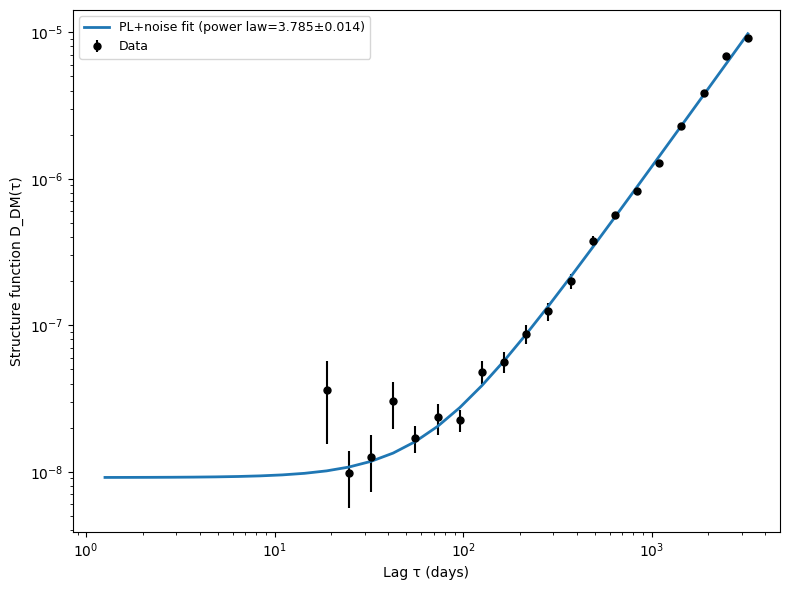

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ----- Model: power-law + noise -----
def D_stochastic(tau, A, beta):
    return A * tau**(beta - 2)

def D_noise(tau, C_noise):
    return np.full_like(tau, C_noise)

def SF_powerlaw_plus_noise(tau, A, beta, C_noise):
    return D_stochastic(tau, A, beta) + D_noise(tau, C_noise)

# ----- Utility: safe fitting -----
def safe_curve_fit(model, x, y, yerr=None, p0=None, bounds=(-np.inf, np.inf), maxfev=20000):
    try:
        popt, pcov = curve_fit(model, x, y, sigma=yerr,
                               absolute_sigma=True if yerr is not None else False,
                               p0=p0, bounds=bounds, maxfev=maxfev)
        perr = np.sqrt(np.diag(pcov))
        return popt, perr
    except Exception as e:
        print("Fit failed:", e)
        return None, None

# ----- Fit data -----
# assume lags, sf, sf_err are available
# e.g. lags, sf, sf_err = compute_structure_function(epochs, dm_values, nbins=30)

valid = ~np.isnan(sf) & np.isfinite(sf) & (sf > 0)
tau_fit = lags[valid]
sf_fit = sf[valid]
err_fit = sf_err[valid]

if len(tau_fit) < 4:
    raise ValueError("Not enough SF points for fits. Need >= 4 valid bins.")

# Initial guess and bounds
# have to somehow improve this guess work, to get a better fit for the power-law + noise model, that matches the reference paper.
A0 = np.median(sf_fit) / (tau_fit[len(tau_fit)//2]**((11/3)-2))  # change this to the constants given in the paper, and then separately multiply them to find A0
p0 = [A0, 11/3, np.min(sf_fit)*0.1]        # A, beta, C_noise
bounds = ([0.0, 0.0, 0.0], [np.inf, 4, np.inf])

popt, perr = safe_curve_fit(SF_powerlaw_plus_noise, tau_fit, sf_fit, yerr=err_fit, p0=p0, bounds=bounds)

if popt is not None:
    A, beta, Cnoise = popt
    print("Power-law + noise fit:")
    print(f"  A = {A:.3e} ± {perr[0]:.3e}")
    print(f"  power-law = {beta:.3f} ± {perr[1]:.3f}")
    print(f"  C_noise = {Cnoise:.3e} ± {perr[2]:.3e}")
else:
    raise RuntimeError("Fit failed.")

# ----- Plot data and fit -----
plt.figure(figsize=(8,6))
plt.errorbar(lags, sf, yerr=sf_err, fmt='o', ms=5, color='k', label='Data')

y_fit = SF_powerlaw_plus_noise(lags, *popt)
plt.plot(lags, y_fit, '-', color='C0', lw=2, label=f'PL+noise fit (power law={beta:.3f}±{perr[1]:.3f})')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lag τ (days)')
plt.ylabel('Structure function D_DM(τ)')
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()